YUKTI PATIL
20097786
GROUP 9
 
We have imported the training and test data. We check for a few values "How expensive are houses? wrt to our target variable i.e price.We check if neighborhoods play a part on the house prices, but from the plot it shows us that the prices are not concentrated to a certain area, its all over.

We then check if the data has any missing values by using 'missingno' and then caluclate the total missing values and the percentage. From the totals we observe that we have multiple types of features, some have missing values, and most are objects.Our target variable here is "price". we checked if the target variable is normally distributed by creating a histogram. one of the assumptions of multiple linear regression is that the features are normally distributed.
The histogram tells us that the price variable is not normally distributed and has a number of outliers.
We then found out the correlation between the target and the predictor variables.
We plotted the beds predictor variable with price using scatter plot, to find outliers which we will get rid of.

We need to then process data. Remove rows with missing target, separate target from predictors.Break off validation set from training data.Separate Numerical columns from Categorical columns.
In the below solution, get_dummies() function to encode categorical features. We are then getting the missing values and replacing them using the Simple Imputer function from sklearn.The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located.

We build the model using XGBRegressor. XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The algorithm comes with built-in cross-validation method at each iteration, taking away the need to explicitly program this search and to specify the exact number of boosting iterations required in a single run. 
We then try to improve the model by feature and implement the algorithm again. This improved MAPE.

We then tried to use GridSearchCV,using GridSearchCV we can give a range of parameters and fit the dataset to the model. This will iterate through the parameter space provided and find the parameter combination that gives the best performance. Depending on the time and computational resources available, the parameter grid can be expanded.
Initially I kept the dataset to 50% train and test. because of the computation time. 
Implement the algorithm again using GridSearchCV. When i submitted the score to kaggle with 50% train set got a MAPE score of 28. Later increased the train dataset to get a MAPE score of 24.

Cross validation is an approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single train-test set split.

Evaluate XGBoost Models With k-Fold Cross Validation
It works by splitting the dataset into k-parts (e.g. k=5 or k=10). Each split of the data is called a fold. The algorithm is trained on k-1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set.

After running cross validation you end up with k different performance scores that you can summarize using a mean and a standard deviation.

The final MAPE score after predicted values were submitted to Kaggle was : 21.37261




In [95]:
#import all libraries
import pandas as pd
import missingno as msno
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [47]:
#Import training data
dftrain = pd.read_csv("train.csv",index_col='ad_id')
dftrain.head()

,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
ad_id,,,,,,,,,,,,,,,,
996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [48]:
# Import test data.
dftest  = pd.read_csv( "test.csv",index_col='ad_id')
dftest.head()

,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
ad_id,,,,,,,,,,,,,,,
12373510,Skerries,2.0,4.0,G,Dublin,"It's all in the name ""Island View"";. Truly won...",prod,"Parking,Alarm,Oil Fired Central Heating",Breath-taking panoramic views radiate from thi...,53.566881,-6.101148,NaN,sale,bungalow,142.0
12422623,Lucan,2.0,3.0,C1,Dublin,REA McDonald - Lucan' s longest established es...,prod,NaN,Gas fired central heating.\nDouble glazed wind...,53.362992,-6.452909,NaN,sale,terraced,114.0
12377408,Swords,3.0,4.0,B3,Dublin,REA Grimes are proud to present to the market ...,prod,NaN,Pristine condition throughout\nHighly sought-a...,53.454198,-6.262964,NaN,sale,semi-detached,172.0
12420093,Lucan,4.0,3.0,A3,Dublin,"REA McDonald, Lucan' s longest established est...",prod,NaN,A-rated home within a short walk of Lucan Vill...,53.354402,-6.458647,NaN,sale,semi-detached,132.4
12417338,Clondalkin,1.0,3.0,E2,Dublin,"Hibernian Auctioneers are delighted to bring, ...",prod,"Parking,Gas Fired Central Heating,Wired for Ca...",Mature Location \nGas Heating \nClose to Ameni...,53.336530,-6.393587,NaN,sale,semi-detached,88.0


In [49]:
print('The training dataset has {} rows and {} columns.'.format(dftrain.shape[0], dftrain.shape[1]))
print('The test dataset has {} rows and {} columns.'.format(dftest.shape[0], dftest.shape[1]))

The training dataset has 2982 rows and 16 columns.
The test dataset has 500 rows and 15 columns.


In [50]:
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    dftrain.price.min(), dftrain.price.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    dftrain.price.mean(), dftrain.price.median()))

The cheapest house sold for $19,995 and the most expensive for $9,995,000
The average sales price is $532,354, while median is $380,000


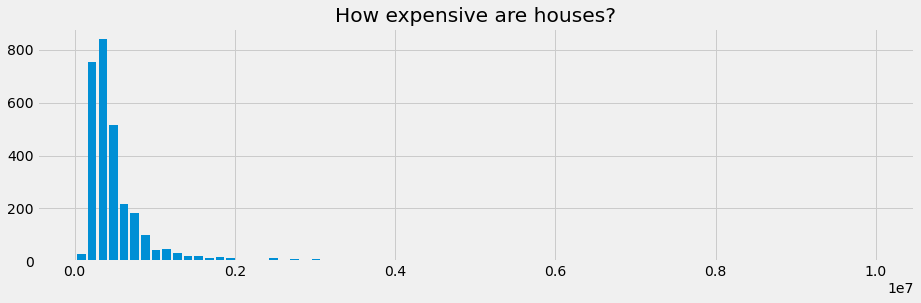

In [51]:
dftrain.price.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

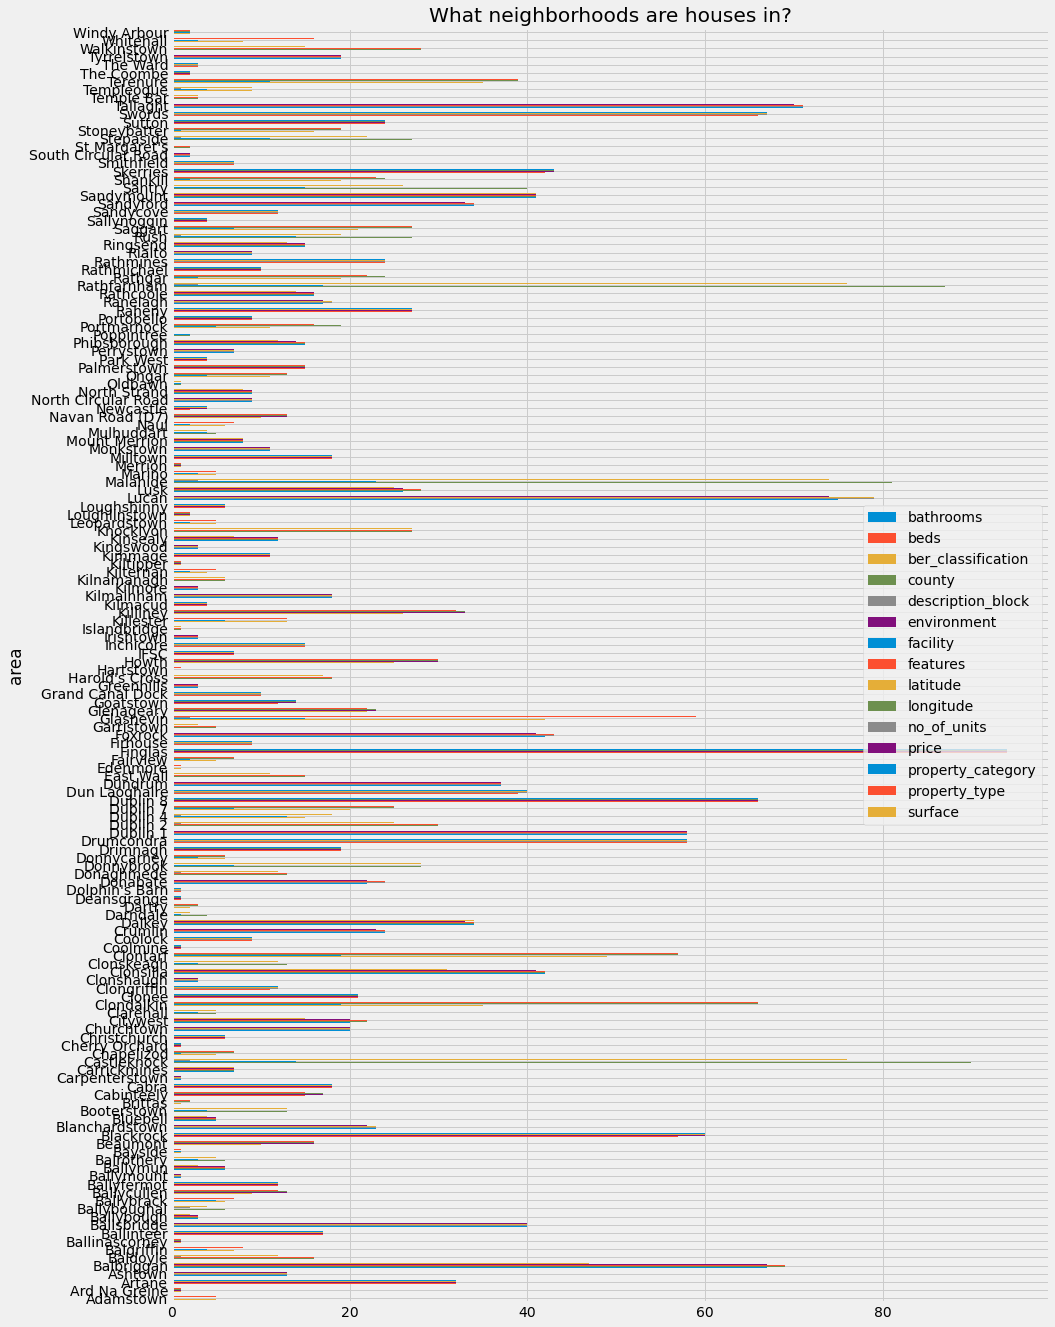

In [52]:
dftrain.groupby('area').count().plot(kind='barh', figsize=(14,21.85))
plt.title('What neighborhoods are houses in?')
plt.show()

In [53]:
# Gives us information about the features. 
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2982 entries, 996887 to 12428358
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                2982 non-null   object 
 1   bathrooms           2931 non-null   float64
 2   beds                2931 non-null   float64
 3   ber_classification  2305 non-null   object 
 4   county              2982 non-null   object 
 5   description_block   2982 non-null   object 
 6   environment         2982 non-null   object 
 7   facility            965 non-null    object 
 8   features            2982 non-null   object 
 9   latitude            2982 non-null   float64
 10  longitude           2982 non-null   float64
 11  no_of_units         59 non-null     float64
 12  price               2892 non-null   float64
 13  property_category   2982 non-null   object 
 14  property_type       2931 non-null   object 
 15  surface             2431 non-null   float64
dt

<AxesSubplot:>

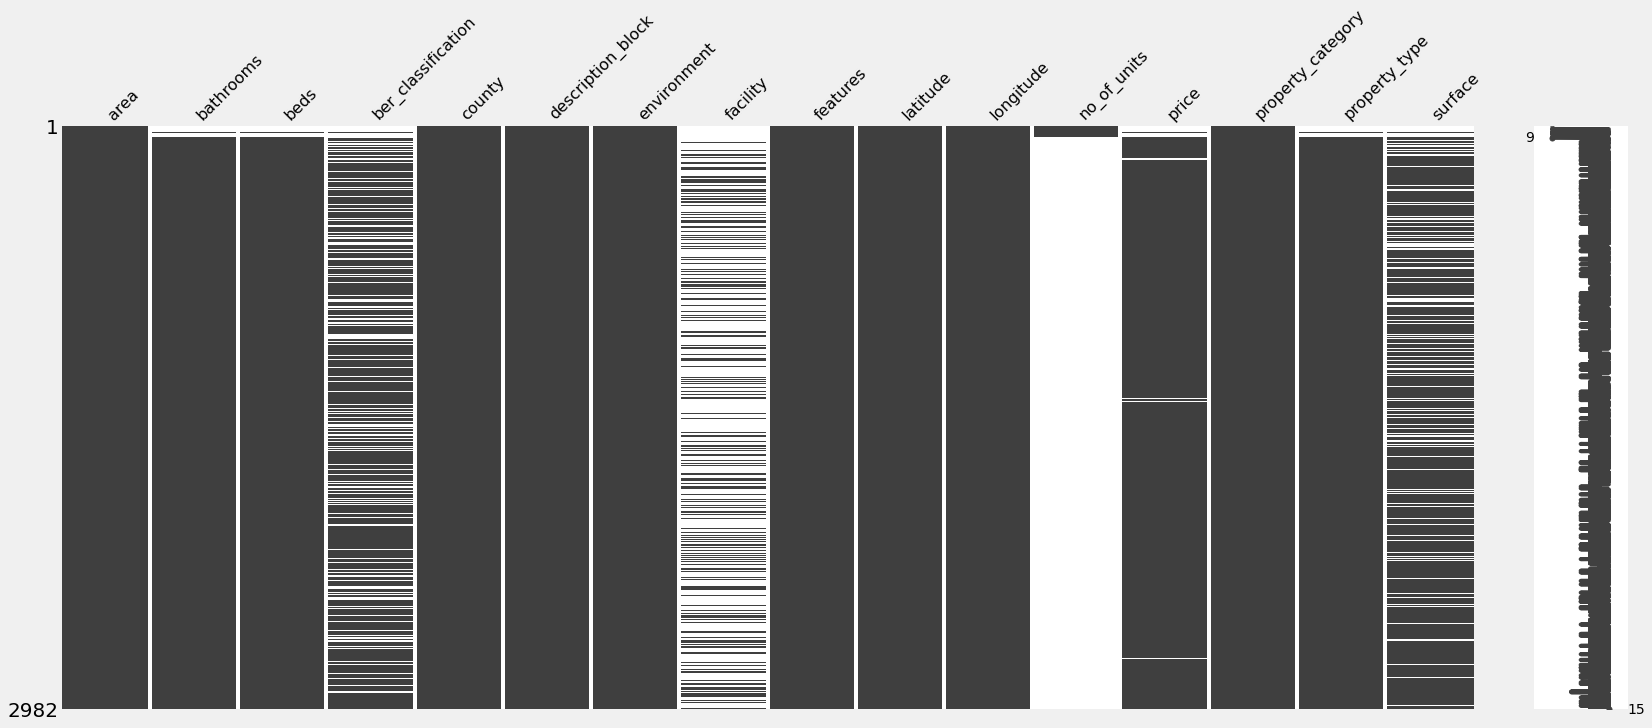

In [54]:
#Check if data has missing values
msno.matrix(dftrain)

In [55]:
##This function takes a DataFrame(df) as input and returns two columns, 
##total missing values and total missing values percentage"""
   
def missing_percentage(df):
   
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

missing_percentage(dftrain)

,Total,Percent
no_of_units,2923,98.02
facility,2017,67.64
ber_classification,677,22.70
surface,551,18.48
price,90,3.02
property_type,51,1.71
beds,51,1.71
bathrooms,51,1.71


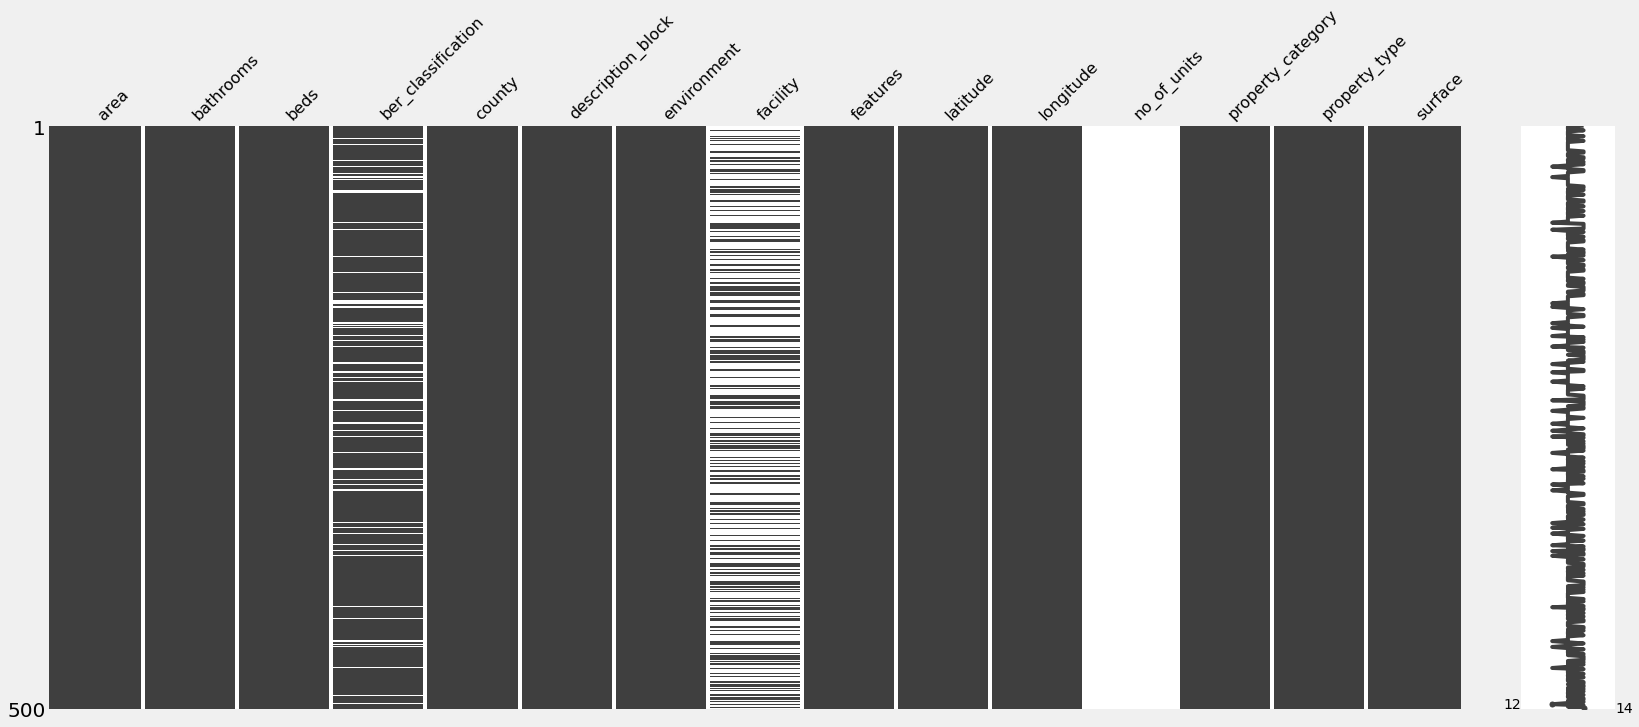

In [56]:
msno.matrix(dftest);

In [57]:
missing_percentage(dftest)

,Total,Percent
no_of_units,500,100.0
facility,311,62.2
ber_classification,56,11.2


/Users/yuktipatil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yuktipatil/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yuktipatil/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/yuktipatil/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylab

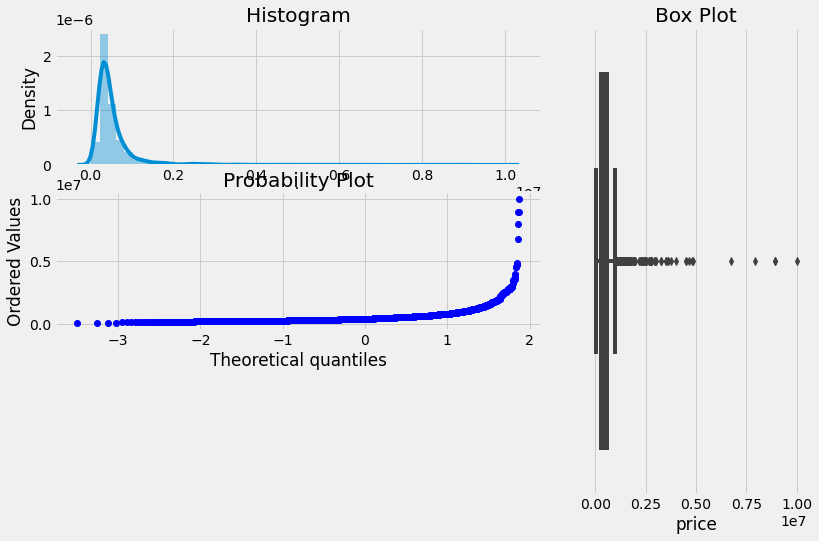

In [58]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(dftrain, 'price')

In [59]:
## Getting the correlation of all the features with target variable. 
(dftrain.corr()**2)["price"].sort_values(ascending = False)[1:]

beds           0.265951
bathrooms      0.247055
no_of_units    0.163568
longitude      0.024929
latitude       0.020094
surface        0.000636
Name: price, dtype: float64

In [60]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

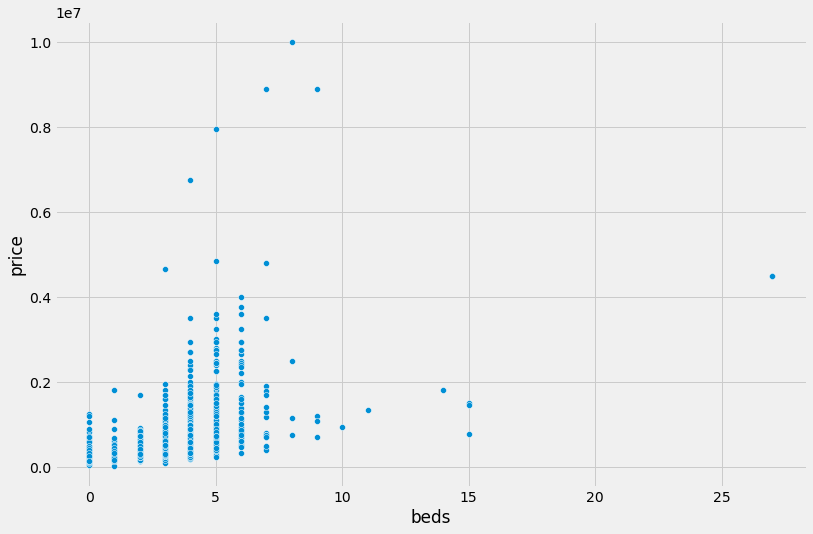

In [61]:
customized_scatterplot(dftrain.price, dftrain.beds)

In [62]:
## Deleting those two values with outliers. 
dftrain = dftrain[dftrain.beds < 10]
dftrain.reset_index(drop = True, inplace = True)


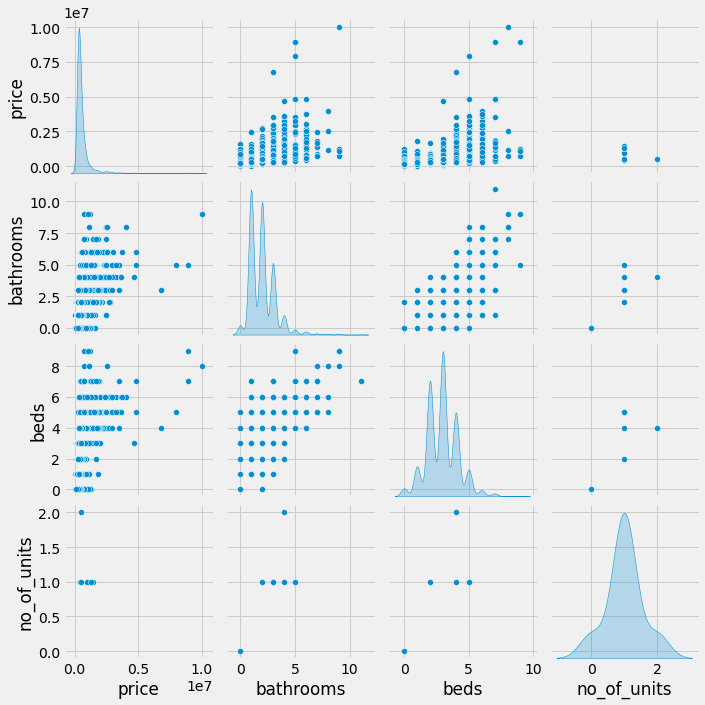

In [63]:
#the impact of the price of the house in different factors.
sns.pairplot(dftrain[["price", "area", "bathrooms", "beds", "property_type", "property_category", "no_of_units", "ber_classification"]], diag_kind="kde")

In [64]:
dftrain.dropna(axis=0, subset=['price'], inplace=True)
y = dftrain.price              
dftrain.drop(['price'], axis=1, inplace=True)

In [66]:
from sklearn.model_selection import train_test_split

X_train_full, X_valid_full, y_train, y_valid = train_test_split(dftrain, y, train_size=0.8, test_size=0.2,random_state=0)

In [67]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = dftest[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [68]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(2307, 10)
no_of_units    2300
surface         393
dtype: int64


In [69]:
X_train.isnull().sum() #to get all columns have or not missing values

bathrooms                                      0
beds                                           0
latitude                                       0
longitude                                      0
no_of_units                                 2300
surface                                      393
county_Dublin                                  0
environment_prod                               0
property_category_new_development_parent       0
property_category_sale                         0
dtype: int64

In [70]:



my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [72]:
# Preprocessed training and validation features
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

In [73]:


# Define the model
model = XGBRegressor(n_estimators=350,max_depth=15,learning_rate=.1,random_state=1,
                     n_jobs=10, subsample=1,min_child_weight=0.6) # Your code here

# Fit the model
model.fit(final_X_train, y_train)

# Get validation predictions and MAPE
preds_valid = model.predict(final_X_valid)

In [74]:
#bathrooms	beds	latitude	longitude	no_of_units	price	surface

feature_columns = [ "bathrooms", "beds", "no_of_units", "surface", "latitude","longitude"]

In [75]:
X_up = dftrain[feature_columns]
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X_up, y, random_state=1)

In [76]:
train_X.columns

Index(['bathrooms', 'beds', 'no_of_units', 'surface', 'latitude', 'longitude'], dtype='object')

In [77]:
X_up.columns

Index(['bathrooms', 'beds', 'no_of_units', 'surface', 'latitude', 'longitude'], dtype='object')

In [78]:
my_imputer_up = SimpleImputer()
imputed_X_up_train = pd.DataFrame(my_imputer_up.fit_transform(train_X))
imputed_X_up_valid = pd.DataFrame(my_imputer_up.transform(val_X))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_up_train.columns = train_X.columns
imputed_X_up_valid.columns = val_X.columns

In [79]:
# Preprocessed training and validation features
final_imputer_up = SimpleImputer(strategy='median')
final_X_train_up = pd.DataFrame(final_imputer_up.fit_transform(train_X))
final_X_valid_up = pd.DataFrame(final_imputer_up.transform(val_X))

# Imputation removed column names; put them back
final_X_train_up.columns = train_X.columns
final_X_valid_up.columns = val_X.columns

In [80]:
model_up = XGBRegressor(n_estimators=350,max_depth=15,random_state=5,learning_rate=.1,
                        n_jobs=10, subsample=1,min_child_weight=0.6) # Your code here

# Fit the model
model_up.fit(final_X_train_up, train_y)

# Get validation predictions and MAPE
preds_valid = model_up.predict(final_X_valid_up)

In [81]:
#CALC MAPE and create a Mape_scorer for Grid SearchCV


def mape(y_true, y_mape_predict):
  
    M = np.hstack([y_true[:,None],y_mape_predict[:,None]])

    mean_Mape = np.mean(np.abs(M[:,0]-M[:,1])/M[:,0])*100
    return mean_Mape

mape_scorer = make_scorer(mape, greater_is_better=False)

In [82]:
Select_parameters = {'min_samples_leaf':[1,2,3,5,6,4,8,9],'random_state':[1,2,3,4,5,6,9,8],
                     'n_estimators':[100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]}

In [83]:
gsearch = GridSearchCV(estimator=XGBRegressor(),
                       param_grid = Select_parameters, 
                       scoring=mape_scorer,
                       n_jobs=-1,cv=3)

In [86]:
gsearch.fit(X_train,y_train)

[23:04:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [88]:
FINALMODEL = XGBRegressor(n_estimators=gsearch.best_params_.get('n_estimators'),  learning_rate=0.1,
                           max_depth=16,random_state=gsearch.best_params_.get('random_state'),
                           subsample=1.0,min_samples_leaf=gsearch.best_params_.get('min_samples_leaf'),
                           n_jobs=4)

In [89]:
FINALMODEL.fit(final_X_train, y_train)

[23:04:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=16,
             min_child_weight=1, min_samples_leaf=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1.0, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [90]:
preds_test = FINALMODEL.predict(X_test)

In [98]:
#Evaluate XGBoost Models With k-Fold Cross Validation
#model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(FINALMODEL, final_X_train, y_train, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/Users/yuktipatil/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[23:09:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:10:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:10:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters a

In [97]:
# Save test predictions to file
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id',  dftest.index.values.astype(int))
Prediction.insert(1, 'Predicted', preds_test)
Prediction.to_csv("Prediction_baseline.csv", index=False)
Prediction

,Id,Predicted
0,12373510,632782.06250
1,12422623,351916.62500
2,12377408,548700.31250
3,12420093,345531.03125
4,12417338,256369.78125
...,...,...
495,12369815,394831.46875
496,12416011,945993.18750
497,12232222,337551.84375
498,11905630,680225.31250
